# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

***The goal of this exercise is to put forth recommendations to used car dealers on inventory management and inform them on factors that are most impactful to used car prices. To do so, we will leverage an existing used car dataset and run supervised prediction algorithms on the dataset with car price being the target variable. We will train multiple regression models based on the existing data and identify the model that is able to most accurately predict car prices. Furthermore, we will determine features (aka drivers) that influence those prices and which used car dealers need to keep in mind when managing their inventory.***

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Bringing in the dataset

df = pd.read_csv('vehicles.csv')

In [4]:
# Overviewing a random sample from the dataset
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
348435,7306392370,greenville / upstate,13850,2007.0,ford,expetion el eddie baur,like new,8 cylinders,gas,167000.0,clean,automatic,NaN,4wd,full-size,SUV,brown,sc
320333,7306982562,medford-ashland,6900,2013.0,dodge,avenger se 4dr sedan,good,4 cylinders,gas,94000.0,clean,automatic,1C3CDZAB4DN645415,fwd,sub-compact,sedan,black,or
50696,7311477895,reno / tahoe,16998,2019.0,honda,civic,excellent,NaN,gas,45490.0,clean,automatic,2HGFC2F67KH581411,fwd,NaN,sedan,white,ca
59090,7311771895,santa barbara,22590,2017.0,chevrolet,camaro lt coupe 2d,good,NaN,other,39336.0,clean,other,1G1FA1RX8H0153100,rwd,NaN,coupe,NaN,ca
92244,7314957816,daytona beach,2995,2003.0,dodge,durango,good,8 cylinders,gas,9600.0,clean,automatic,NaN,rwd,full-size,SUV,NaN,fl


In [5]:
# Understand data elements
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
#Undertand value spread for object features
df.select_dtypes('object').nunique()

,0
region,404
manufacturer,42
model,29649
condition,6
cylinders,8
fuel,5
title_status,6
transmission,3
VIN,118246
drive,3


In [7]:
#List out values for objects (except model, VIN and region)
for col in df.select_dtypes('object').columns:
   if col != 'model' and col != 'VIN' and col != 'region':
        print(col)
        print(df[col].unique())
        print(" ")
        print(" ")

manufacturer
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
 
 
condition
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
 
 
cylinders
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
 
 
fuel
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
 
 
title_status
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
 
 
transmission
[nan 'other' 'automatic' 'manual']
 
 
drive
[nan 'rwd' '4wd' 'fwd']
 
 
size
[nan 'full-size' 'mid-size' 'compact' 'sub-compact']
 
 
type
[nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'o

In [8]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
#Check for missing values
df.isna().sum()

#Check for % of data that is missing
round(df.isna().sum()/len(df)*100,2)

,0
id,0.00
region,0.00
price,0.00
year,0.28
manufacturer,4.13
model,1.24
condition,40.79
cylinders,41.62
fuel,0.71
odometer,1.03


<Axes: >

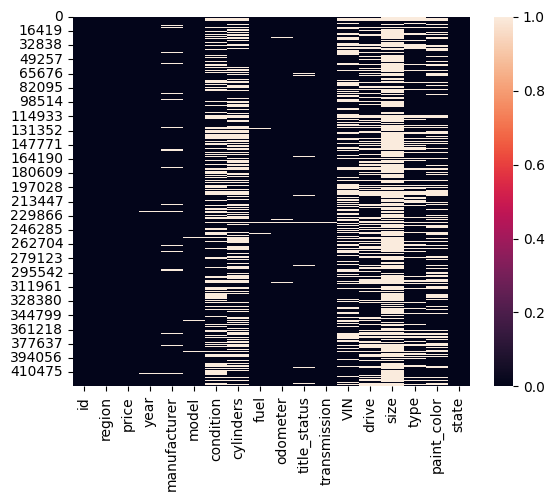

In [10]:
#Visualize Missing Values
sns.heatmap(df.isna())

In [11]:
#Drop the columns that are not relevant for the business problem  (e.g. ID, VIN) or will likely not be informative due to the fact that they carry too many values (e.g.model)
df = df.drop(columns= ['id', 'VIN', 'model', 'region'])

In [12]:
#Drop columns with more than 20% of missing values as they will likely not be informative in the predictive model
df = df.drop(columns = ['condition','cylinders', 'size', 'drive', 'paint_color', 'type'])

In [13]:
#Renaming column "title_status" to be more informative
df.rename(columns={'title_status': 'car_condition'}, inplace=True)

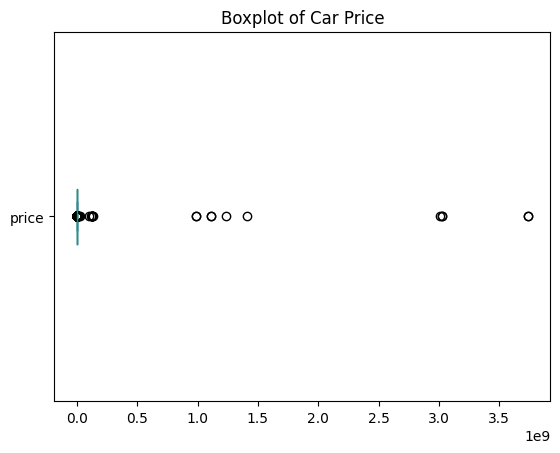

In [14]:
#Understand the distribution of price per car using boxplot to visualize outliers
df["price"].plot(kind = 'box', vert = False, title = "Boxplot of Car Price");

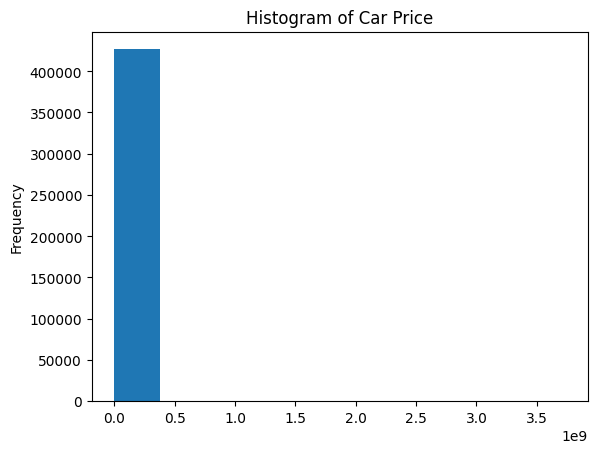

In [15]:
#Understand the distribution of price per car using histogram
df["price"].plot(kind = 'hist', title = "Histogram of Car Price");

In [16]:
#Price data include cars with price = 0$. Examine how many cars are "free" and drop those rows as it is not realistic
zero_count = (df['price'] == 0.000000).sum()
zero_count/len(df)*100
df = df[df['price'] != 0]
len(df)

393985

In [17]:
#Majority of price data is limited within a certain range
count_high = (df['price'] >= 100000).sum()
count_high
# We will not drop these values as we will treat remaining outliers after log transformation

np.int64(697)

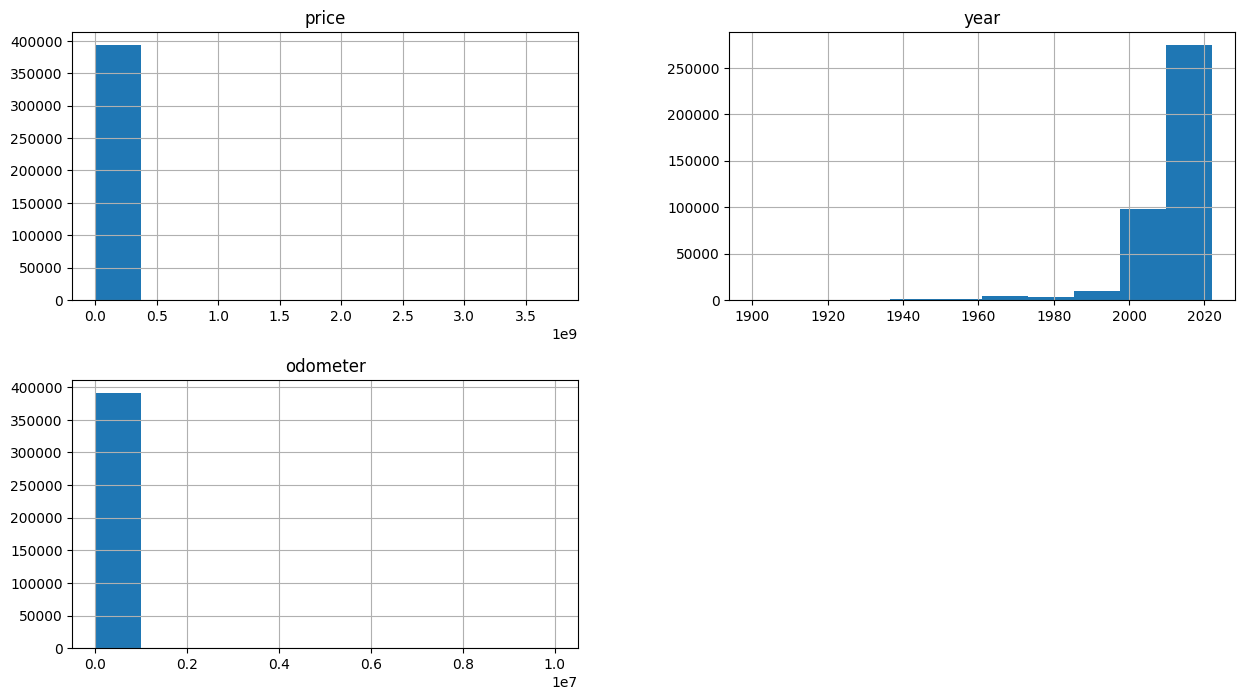

In [18]:
#Understanding spread of numerical features:
df.hist(figsize = (15,8));

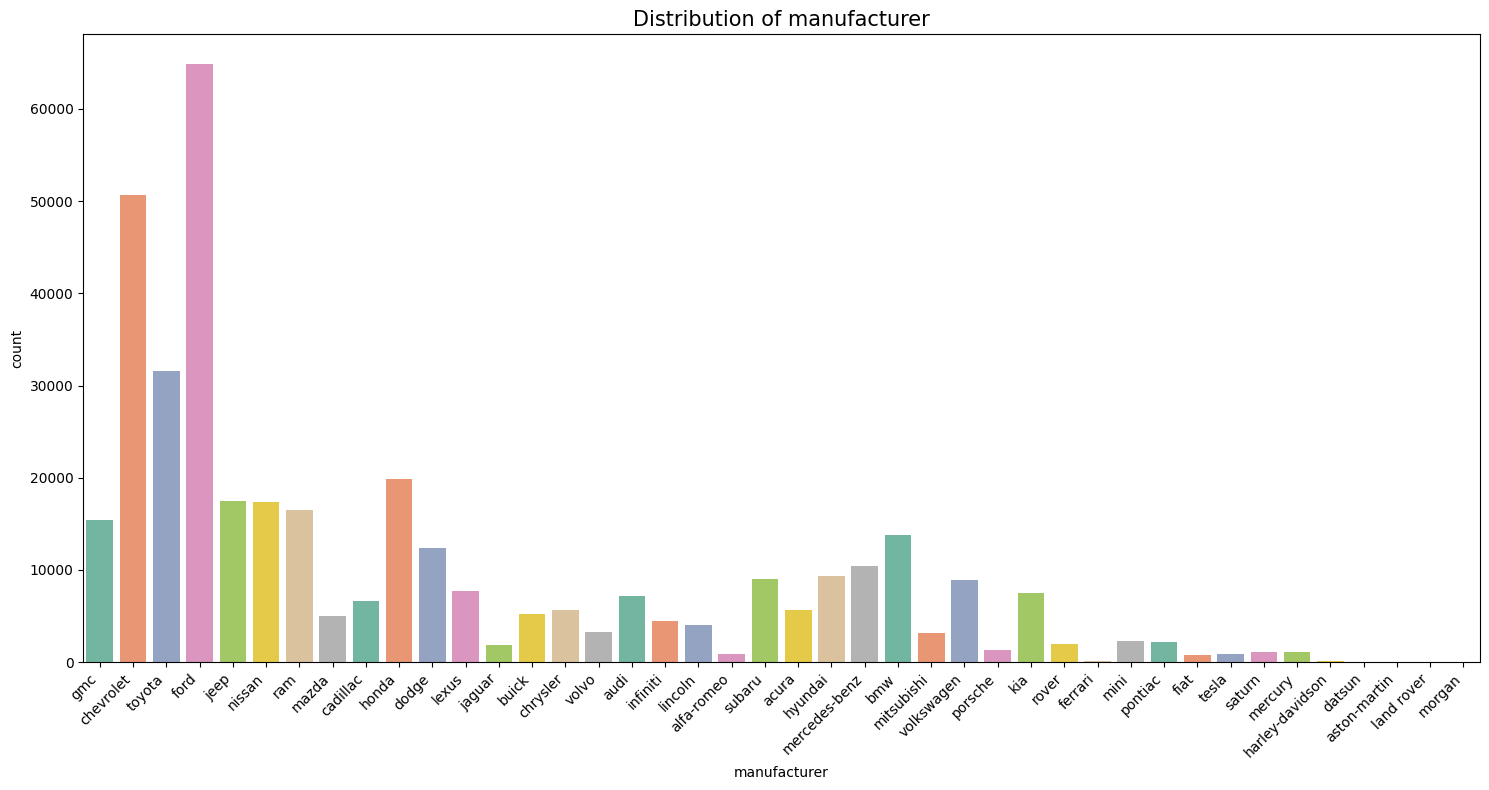

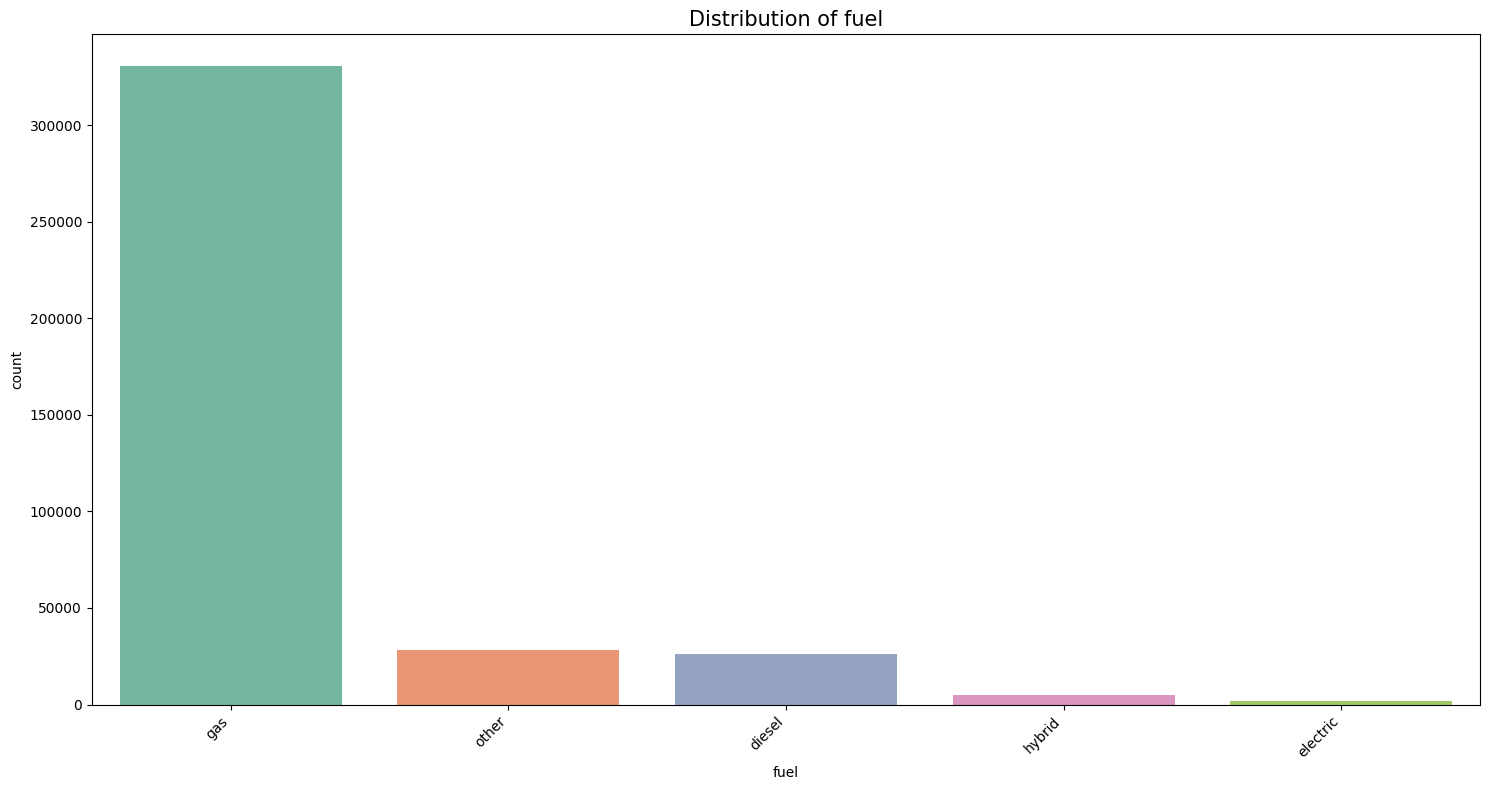

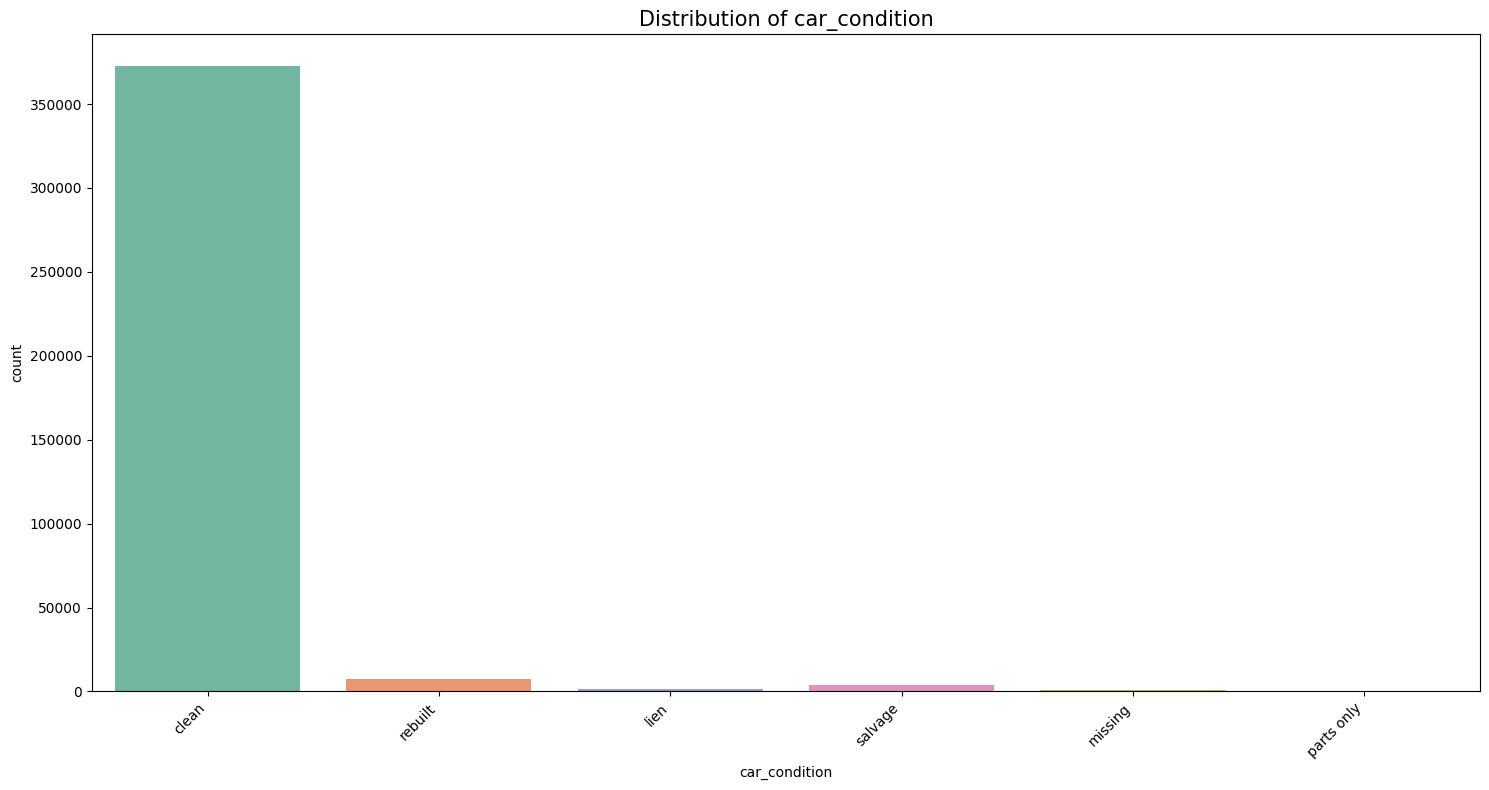

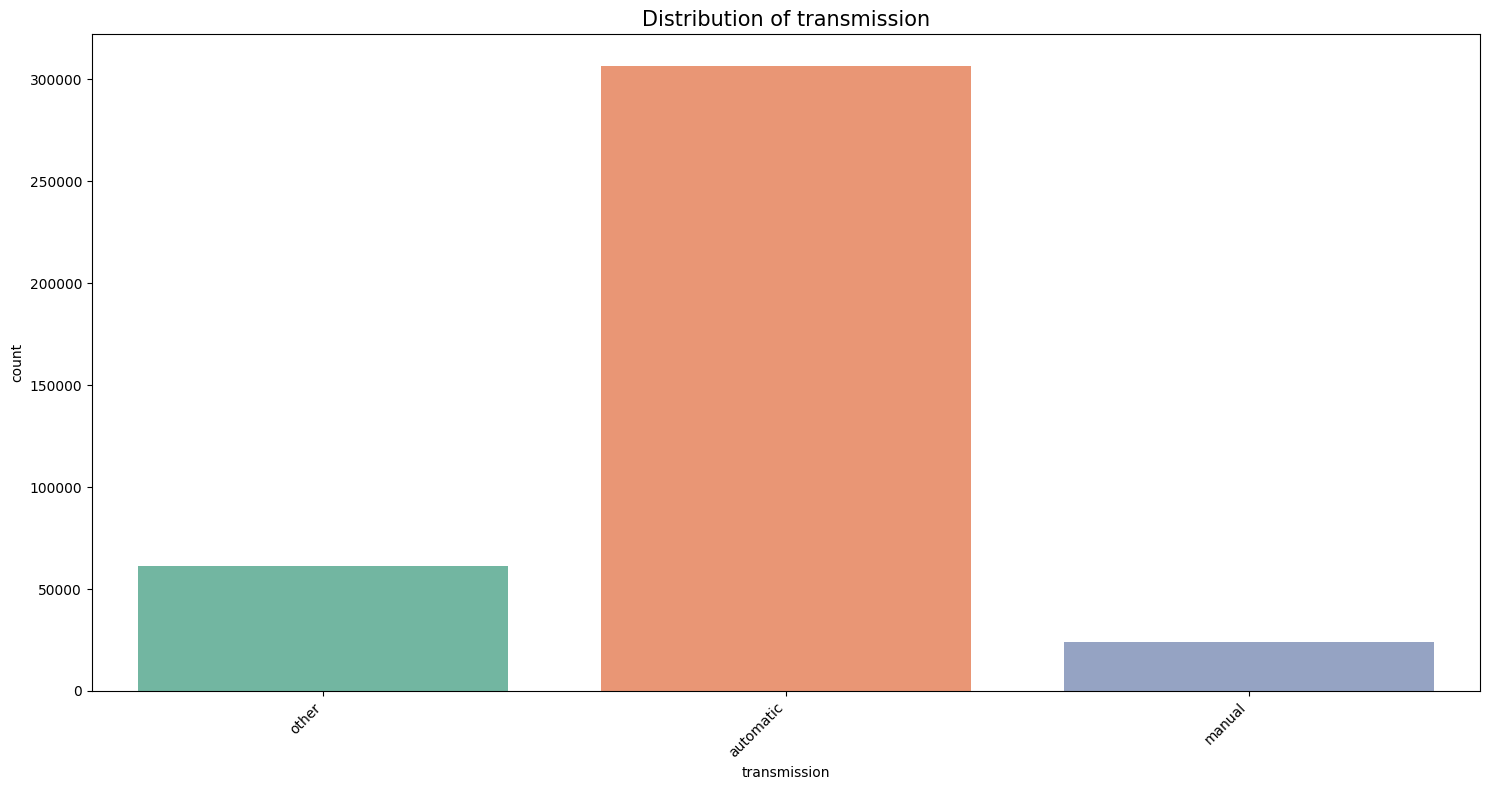

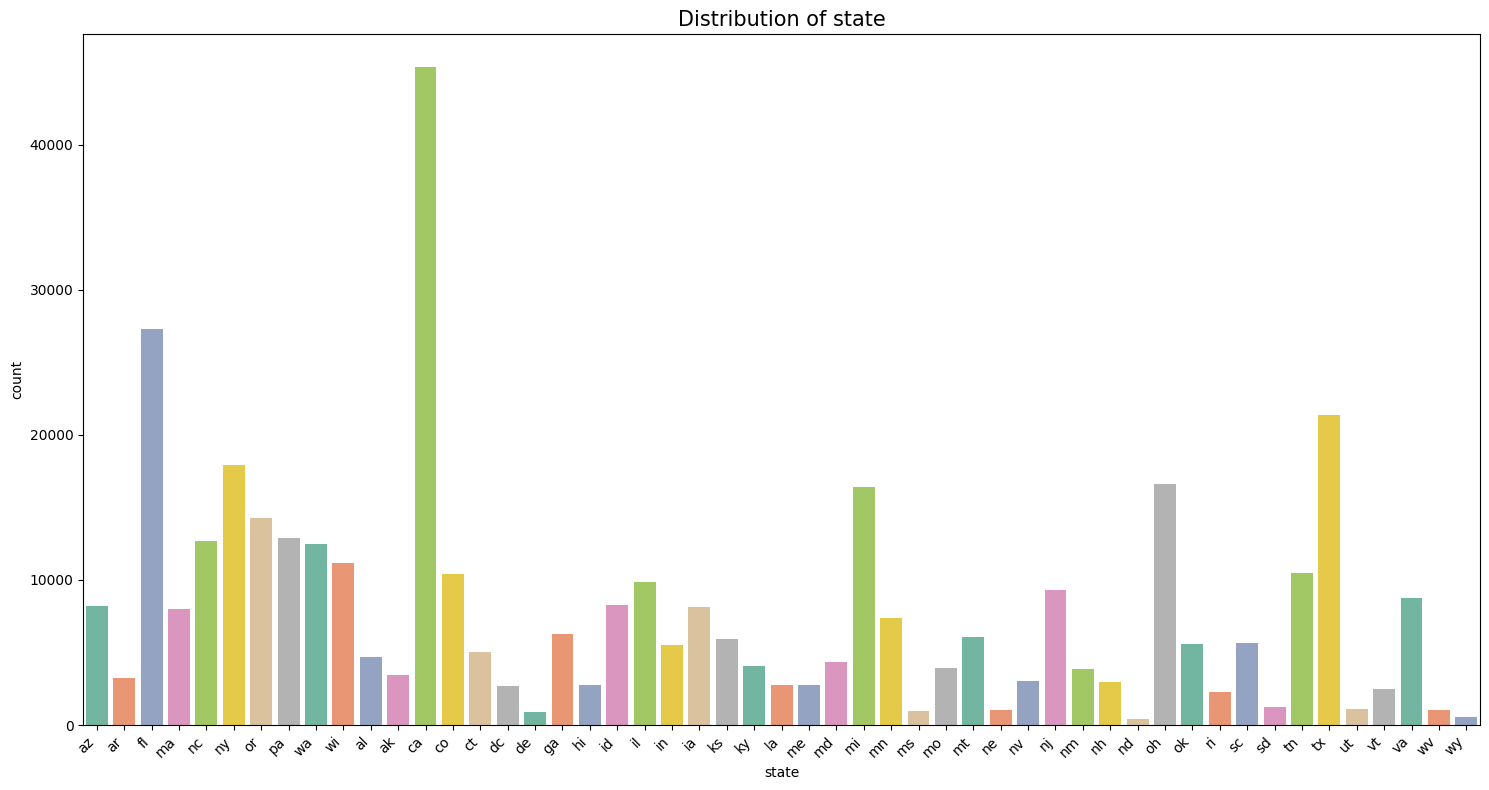

In [19]:
#Understanding spread of categorical features:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(15, 8))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.tight_layout()
    plt.show()
    print("  ")

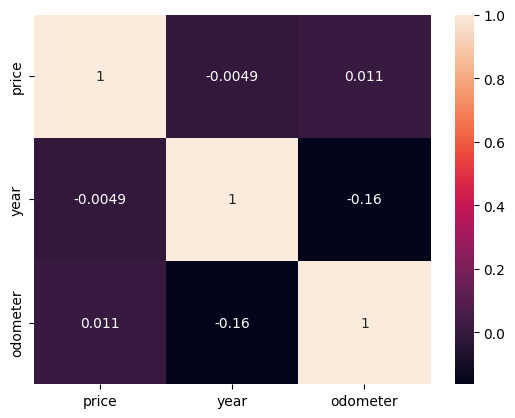

In [20]:
#Understanding correlation between price and numerical features
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True); #corr might be masked by outliers that remain in data

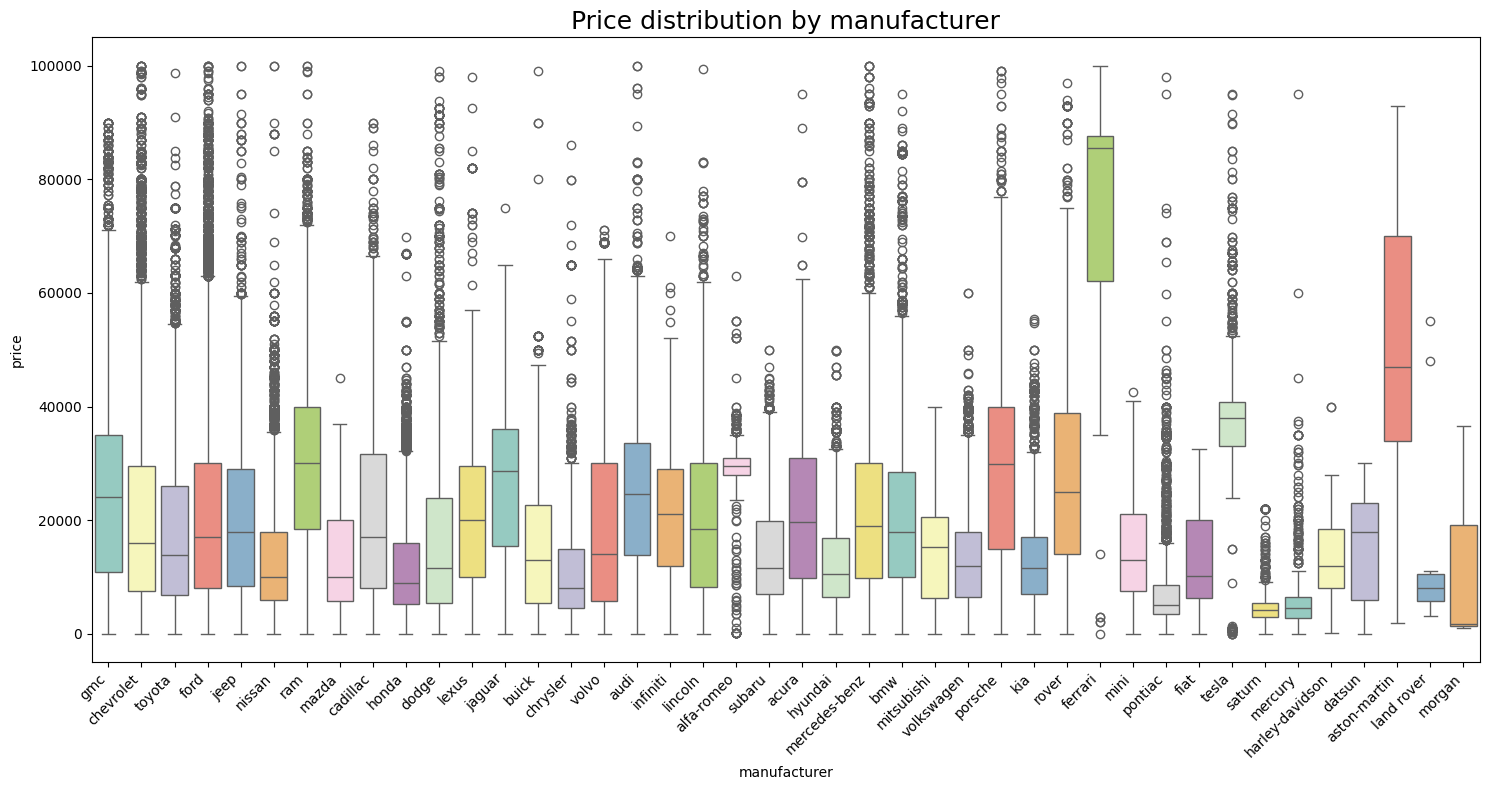

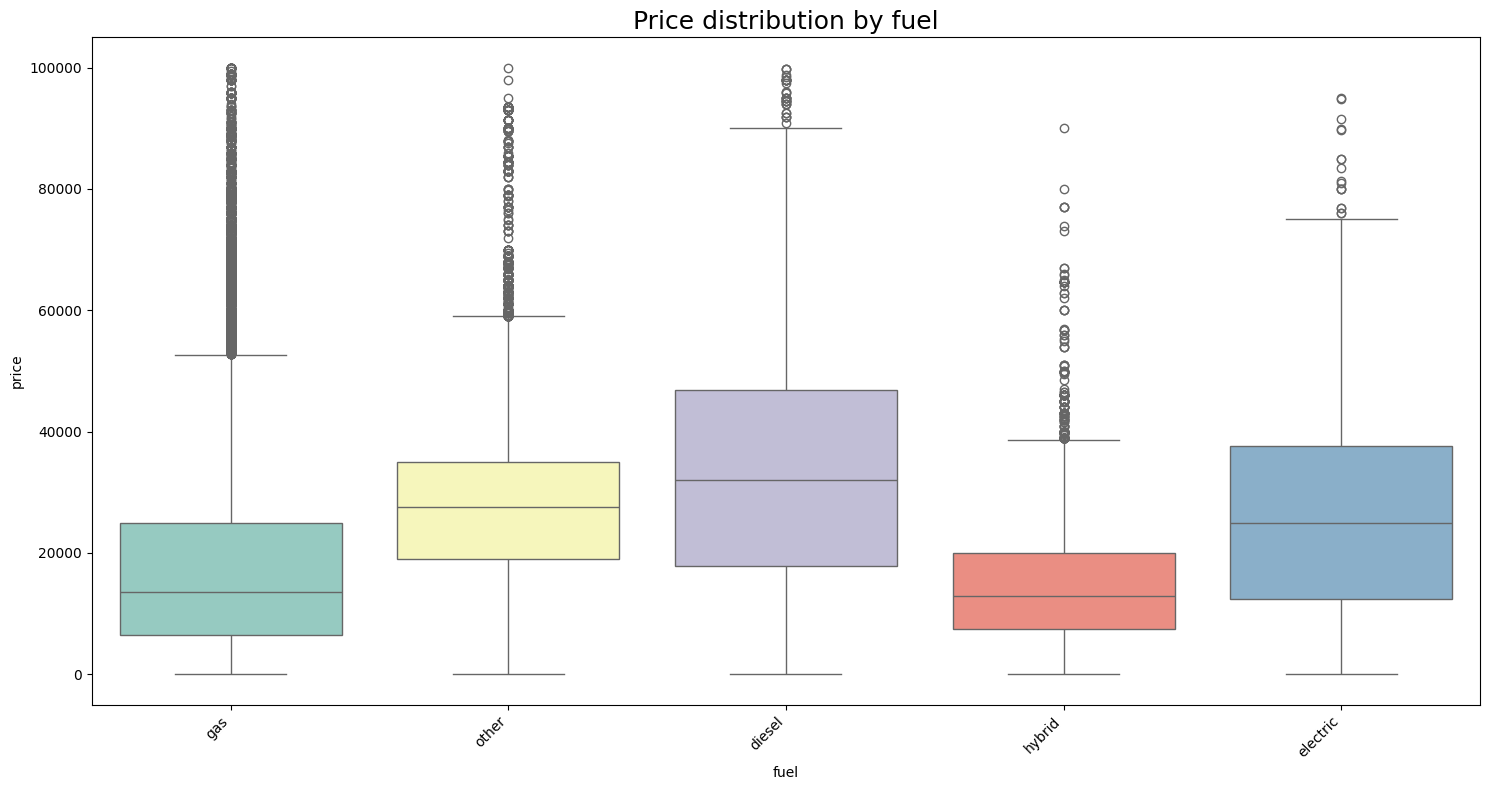

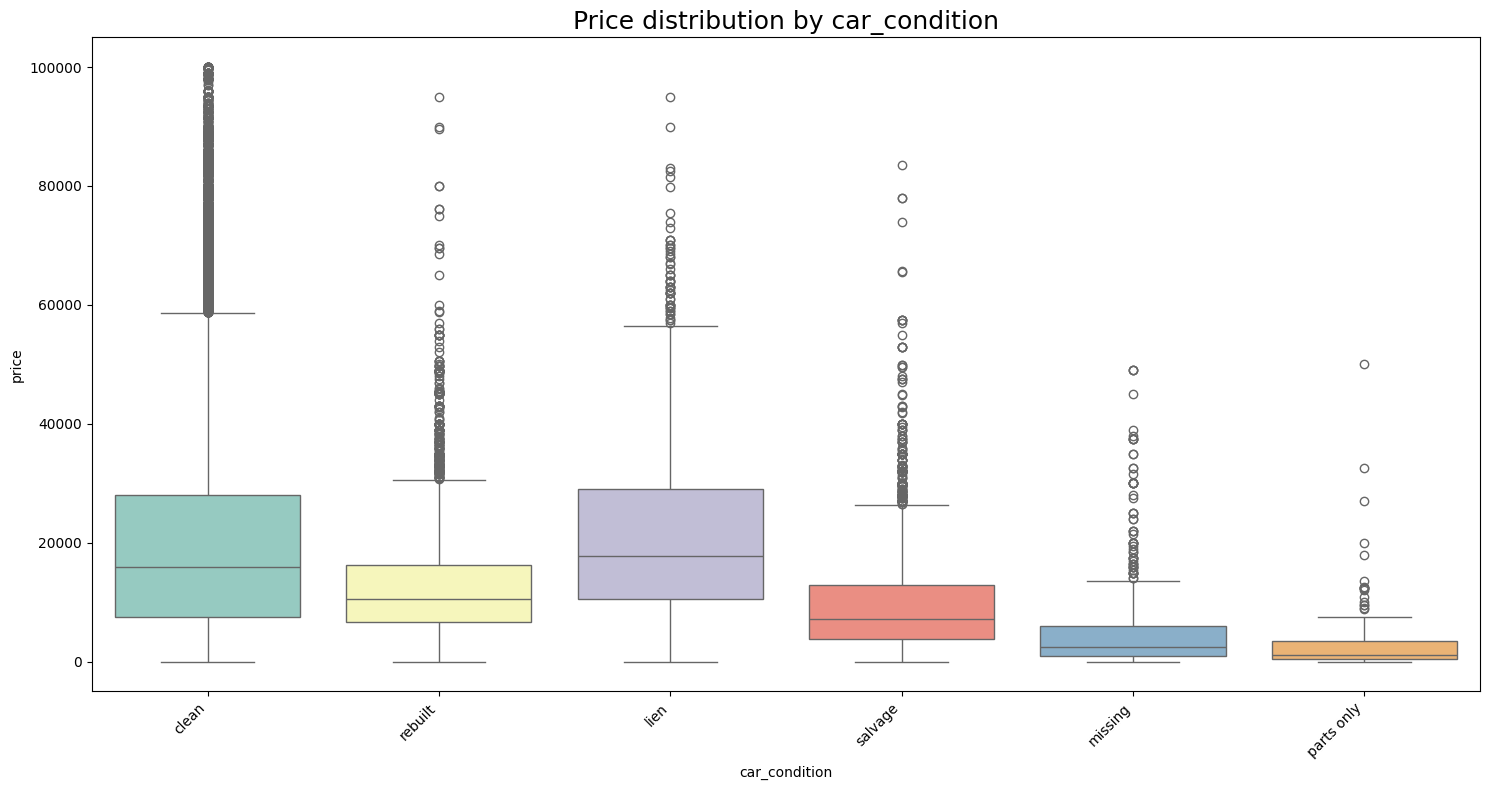

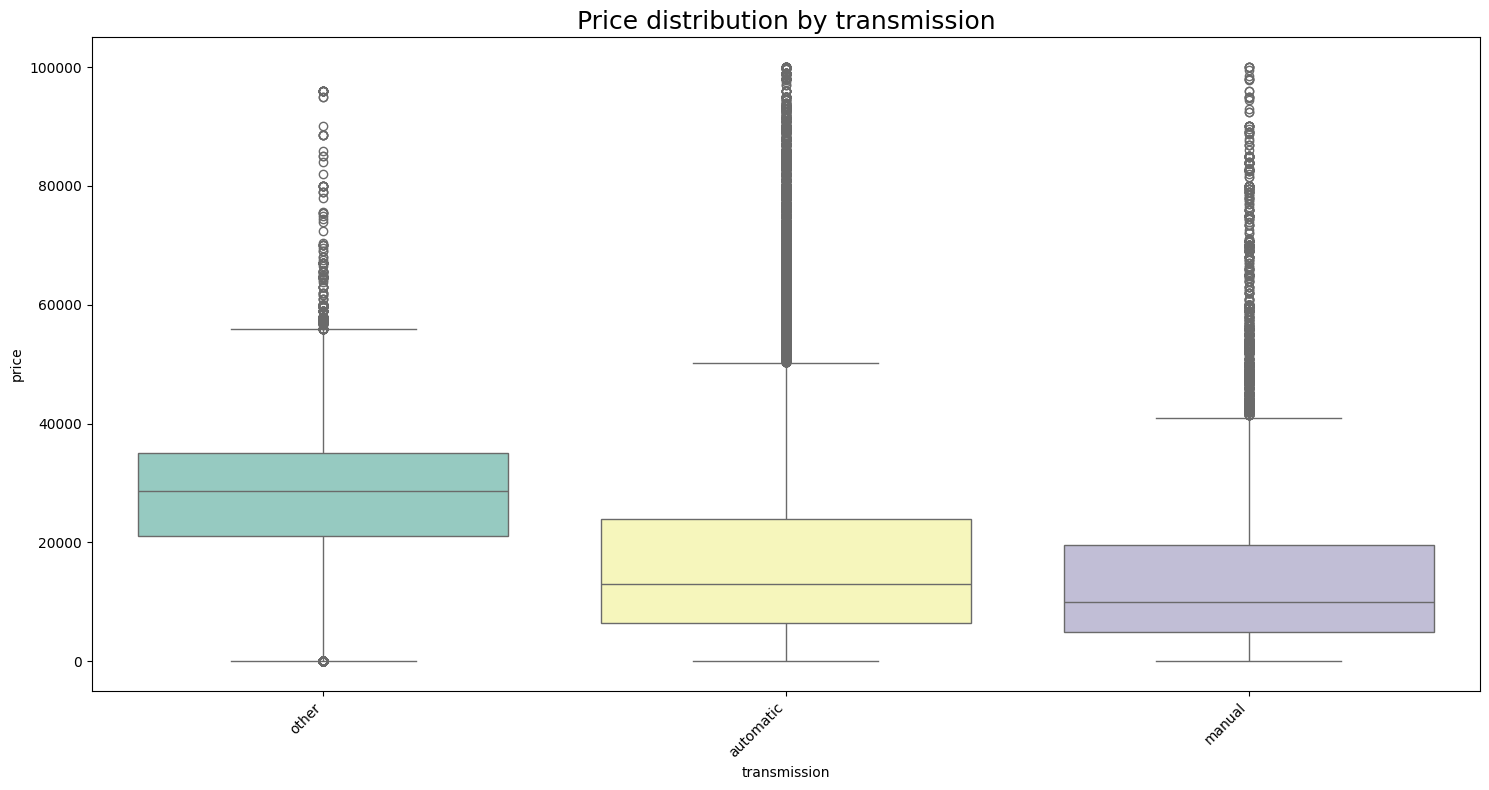

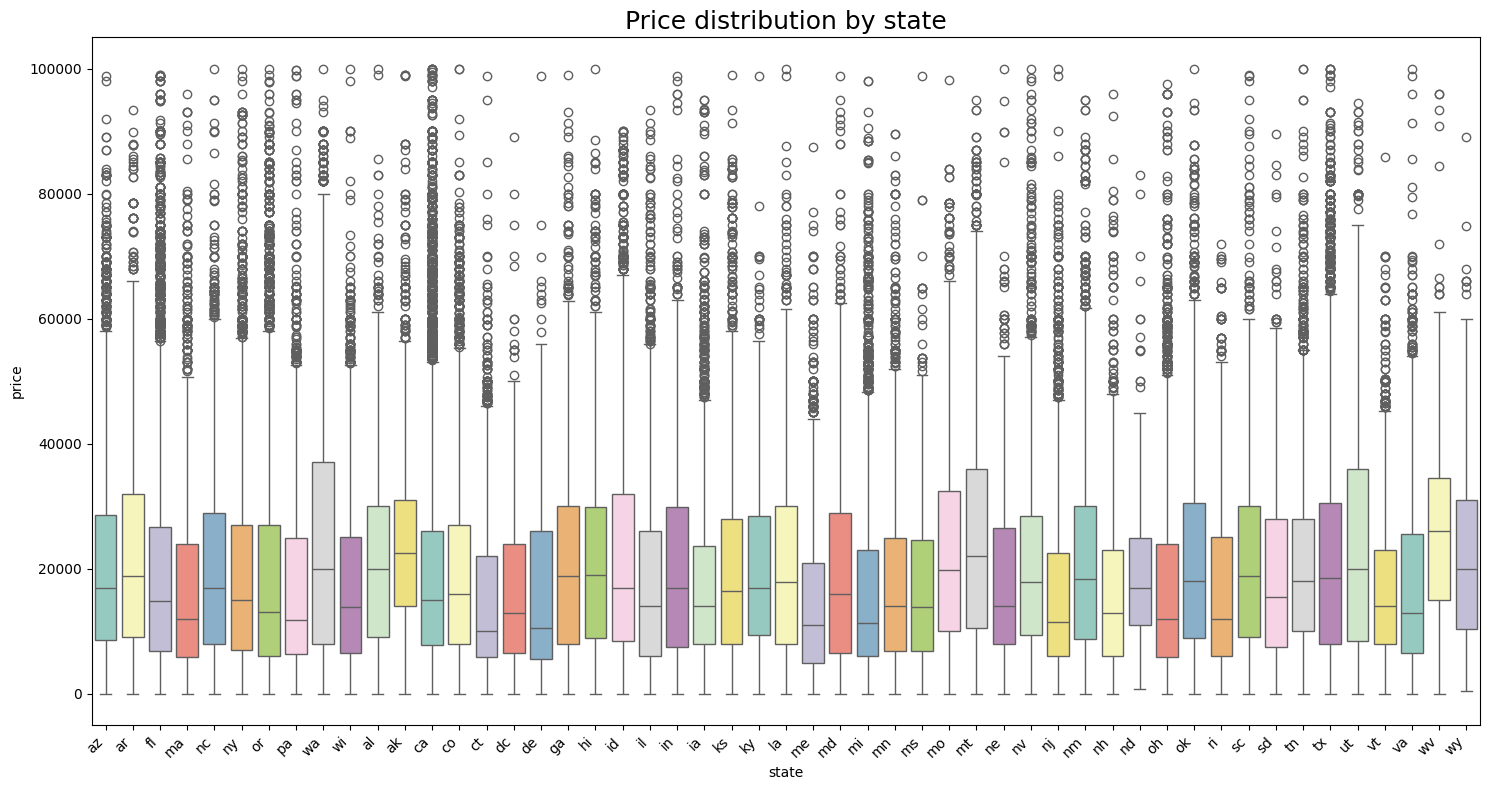

In [21]:
#Visualize Price distribution for each of the categorical features
cat_cols = df.select_dtypes(include=['object']).columns
df_filtered = df[df['price'] < 100000] #Reducing range for visualization purposes

for col in cat_cols:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=col, y='price', data=df_filtered, palette='Set3')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Price distribution by {col}', fontsize=18)
    plt.tight_layout()
    plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [22]:
df.sample(10)

,price,year,manufacturer,fuel,odometer,car_condition,transmission,state
57754,7995,2011.0,chevrolet,gas,182065.0,clean,automatic,ca
88915,20590,2017.0,ford,gas,48250.0,clean,other,dc
191216,1000,2013.0,honda,gas,108745.0,clean,automatic,ma
23739,8499,2011.0,chrysler,gas,131254.0,clean,automatic,ca
235836,13998,2010.0,chevrolet,hybrid,149486.0,clean,automatic,nc
37752,6999,2011.0,hyundai,gas,194416.0,clean,automatic,ca
363868,21995,2014.0,ram,other,163063.0,clean,automatic,tx
26347,14995,2015.0,hyundai,gas,52000.0,clean,automatic,ca
124326,27990,2017.0,chevrolet,gas,22120.0,clean,other,ga
189209,34590,2019.0,chevrolet,gas,7711.0,clean,other,ma


In [23]:
#In this section we will impute missing values for all remaining features

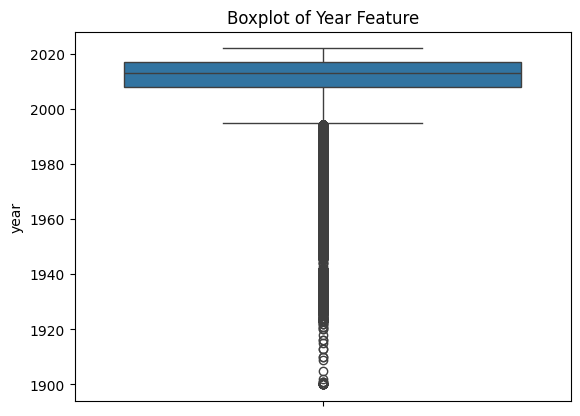

In [25]:
#Generate boxplot of year feature to visualize spread
sns.boxplot(df['year'])
plt.title("Boxplot of Year Feature")
plt.show()

In [26]:
#Year Feature
#The Year feature is concentrated around the 50% with few outliers that might skew the dataset mean. As such we will imput with the median the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['year'] = imputer.fit_transform(df[['year']])

In [27]:
#Manufacturer Feature
#The manufacturer feature is missing some values and is categorical. Let's understand characteristic of missing entries to better inform how to impute them
df_manu_na = df[df['manufacturer'].isna()]
#Some of these missing manufacturer entries are missing information for other features. Let's drop rows for which we are missing 3 or more features
rows_with3plus_missing = df[df.isnull().sum(axis=1) >= 3]
df = df[df.isnull().sum(axis=1)<3]
#We noticed that the rows with missing manufacturer tend to have more diesel cars then typically seen for a used car
percent_diesel_subset = (df_manu_na["fuel"] == "diesel").sum()/len(df_manu_na)
percent_diesel_main = (df["fuel"] == "diesel").sum()/len(df)
print(f'Percent of cars with missing manufacturer that are diesel: {percent_diesel_subset:0.2%}')
print(f'Percent of cars in general that are diesel: {percent_diesel_main:0.2%}')

Percent of cars with missing manufacturer that are diesel: 21.34%
Percent of cars in general that are diesel: 6.69%


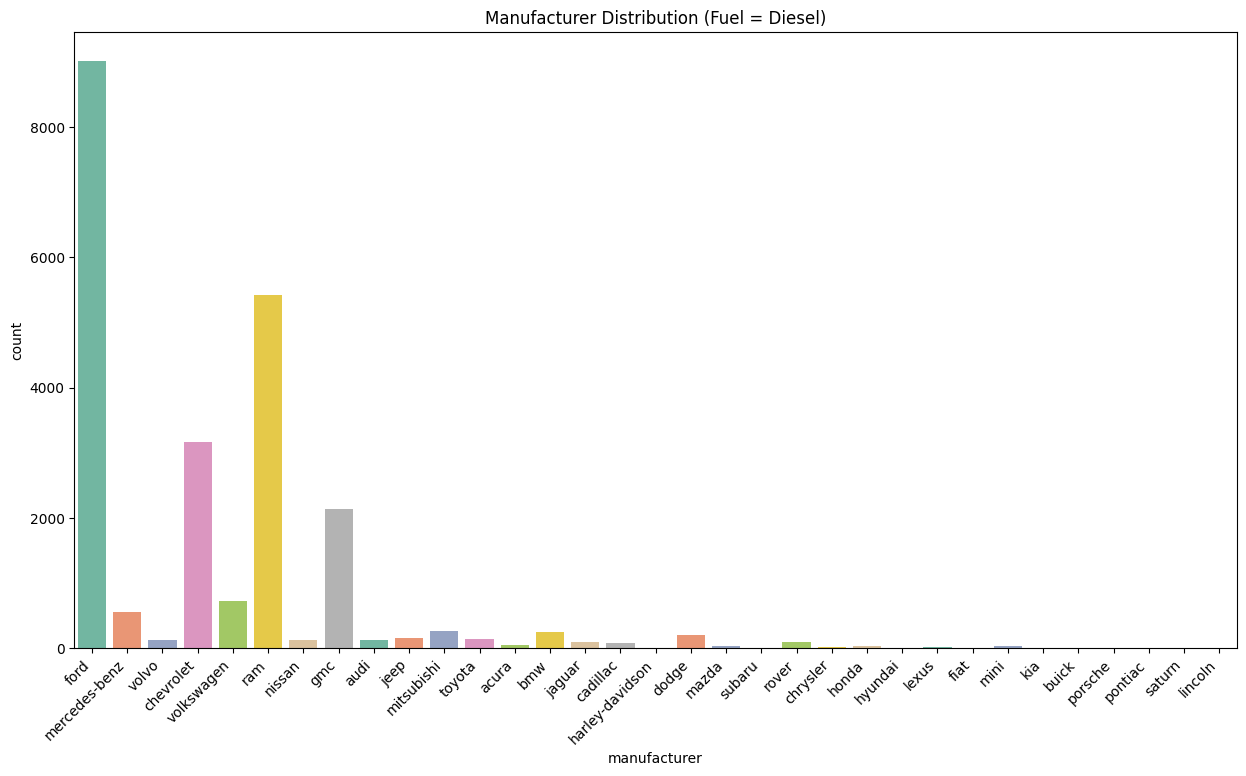

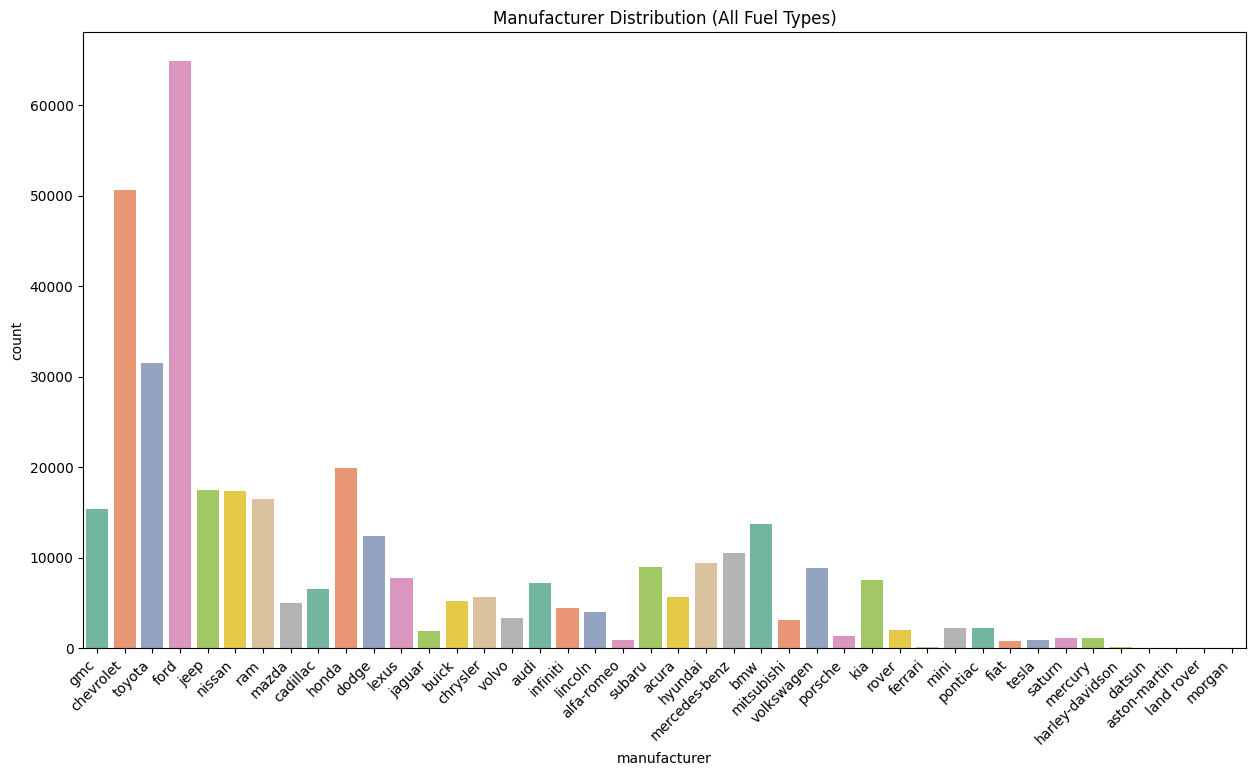

In [28]:
##Manufacturer Feature
# To understand how to impute missing values, explore if there is a dominant manufacturer for diesel cars and review general distribution of manufacturers

# Understand manufacturer distribution for diesel cars
plt.figure(figsize=(15, 8))
sns.countplot(x="manufacturer", data=df[df["fuel"]=="diesel"], palette='Set2')
plt.title('Manufacturer Distribution (Fuel = Diesel)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Understand manufacuter distribution in general
plt.figure(figsize=(15, 8))
sns.countplot(x="manufacturer", data=df, palette='Set2')
plt.title('Manufacturer Distribution (All Fuel Types)')
plt.xticks(rotation=45, ha='right')
plt.show()

#Here we see that ford is not only the most common manufacturer but also a frequent manufacturer for diesel cars. As such we will impute missing values of manufacturers with "ford"
df = df.fillna({'manufacturer': 'ford'})

In [29]:
#Fuel Feature
#From the plots above, we see that most cars use gas for fuel so we will impute with this value
df = df.fillna({'fuel': 'gas'})

In [30]:
#Car Condition Feature
#From the countplots, we see that most cars are clean when it comes to their condition so we will impute missing values with "clean"
df = df.fillna({'car_condition': 'clean'})

In [31]:
#Transmission
#From the plots above, we see that most cars have automatic transmission. We will impute missing values with "automatic"
df = df.fillna({'transmission': 'automatic'})

In [32]:
#Odometer Feature
#The odometer data is skewed with a lot of outliers. As such we will use the median of the data to impute missing values
imputer = SimpleImputer(strategy='median')
df['odometer'] = imputer.fit_transform(df[['odometer']])

In [33]:
#Confirm no remaining missing values
df.isna().sum()

,0
price,0
year,0
manufacturer,0
fuel,0
odometer,0
car_condition,0
transmission,0
state,0


In [34]:
df.head()

,price,year,manufacturer,fuel,odometer,car_condition,transmission,state
27,33590,2014.0,gmc,gas,57923.0,clean,other,al
28,22590,2010.0,chevrolet,gas,71229.0,clean,other,al
29,39590,2020.0,chevrolet,gas,19160.0,clean,other,al
30,30990,2017.0,toyota,gas,41124.0,clean,other,al
31,15000,2013.0,ford,gas,128000.0,clean,automatic,al


In [35]:
#We are left with two numerical features (odometer and year) and five categorical features (manufacturer, car_condition, transmission, fuel and state)
#None of these categorical features are ordinal. The state and manufacturer features have numerous value so one hot encoding might slow down model processing
#As such we will leverage one hot encoding methodology to convert fuel, transmission and car_condition features. We will use frequency encoding to convert manufacturer and state

In [36]:
# One-hot encode fuel, transmission and car condition
df_encoded = pd.get_dummies(df[['fuel', 'transmission', 'car_condition']], drop_first=True)
df_encoded = df_encoded.astype(int)

# Frequency encoding for manufacturer and state
for col in ['manufacturer', 'state']:
    freq = df[col].value_counts(normalize=True)
    df[f'{col}_freq'] = df[col].map(freq)

# Combine with other features
df_encoded = pd.concat([df_encoded, df[['price', 'year', 'odometer', 'manufacturer_freq', 'state_freq']]], axis=1)
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393499 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fuel_electric             393499 non-null  int64  
 1   fuel_gas                  393499 non-null  int64  
 2   fuel_hybrid               393499 non-null  int64  
 3   fuel_other                393499 non-null  int64  
 4   transmission_manual       393499 non-null  int64  
 5   transmission_other        393499 non-null  int64  
 6   car_condition_lien        393499 non-null  int64  
 7   car_condition_missing     393499 non-null  int64  
 8   car_condition_parts only  393499 non-null  int64  
 9   car_condition_rebuilt     393499 non-null  int64  
 10  car_condition_salvage     393499 non-null  int64  
 11  price                     393499 non-null  int64  
 12  year                      393499 non-null  float64
 13  odometer                  393499 non-null  float

In [37]:
#Price Feature
# Convert price to Log and plot distribution
df_encoded['price_log'] = np.log(df_encoded['price'])
df_encoded.drop('price', axis = 1, inplace = True)
df_encoded.head()

,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_manual,transmission_other,car_condition_lien,car_condition_missing,car_condition_parts only,car_condition_rebuilt,car_condition_salvage,year,odometer,manufacturer_freq,state_freq,price_log
27,0,1,0,0,0,1,0,0,0,0,0,2014.0,57923.0,0.039184,0.011972,10.421984
28,0,1,0,0,0,1,0,0,0,0,0,2010.0,71229.0,0.128585,0.011972,10.025263
29,0,1,0,0,0,1,0,0,0,0,0,2020.0,19160.0,0.128585,0.011972,10.586332
30,0,1,0,0,0,1,0,0,0,0,0,2017.0,41124.0,0.080201,0.011972,10.341420
31,0,1,0,0,0,0,0,0,0,0,0,2013.0,128000.0,0.205251,0.011972,9.615805


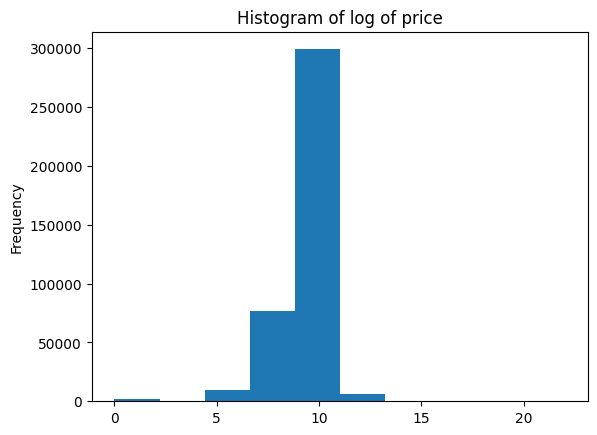

In [38]:
#Plot the distribution of log of price
df_encoded['price_log'].plot(kind = 'hist', title = "Histogram of log of price");

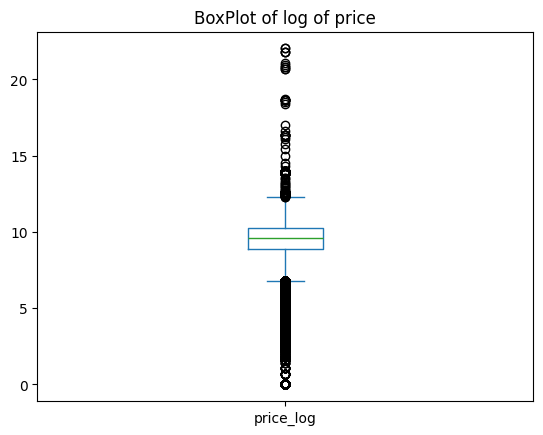

In [39]:
df_encoded['price_log'].plot(kind = 'box', title = "BoxPlot of log of price");
# given that log transformation of price data has taken care of outliers spread we will not apply any further outlier treatment

In [40]:
df_encoded.head()

,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_manual,transmission_other,car_condition_lien,car_condition_missing,car_condition_parts only,car_condition_rebuilt,car_condition_salvage,year,odometer,manufacturer_freq,state_freq,price_log
27,0,1,0,0,0,1,0,0,0,0,0,2014.0,57923.0,0.039184,0.011972,10.421984
28,0,1,0,0,0,1,0,0,0,0,0,2010.0,71229.0,0.128585,0.011972,10.025263
29,0,1,0,0,0,1,0,0,0,0,0,2020.0,19160.0,0.128585,0.011972,10.586332
30,0,1,0,0,0,1,0,0,0,0,0,2017.0,41124.0,0.080201,0.011972,10.341420
31,0,1,0,0,0,0,0,0,0,0,0,2013.0,128000.0,0.205251,0.011972,9.615805


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [41]:
#Before we run any modeling we need to scale our features with the exception of log_price (target variable and already transformed to log) and the one hot encoded features of fuel, transmission & car_condition as they are binary

In [42]:
#Create train test datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('price_log', axis = 1)
y = df_encoded['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
#Scale relevant features
col_scale = ['year', 'odometer', 'manufacturer_freq', 'state_freq']

scaler = StandardScaler()

#Fitting on train data
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Apply same scaler to test
X_test[col_scale] = scaler.transform(X_test[col_scale])

In [44]:
#Modeling - explore linear regression, lasso regression and ridge regression

In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model instance
model_linear = LinearRegression()

# Fitting on train data
model_linear.fit(X_train, y_train)

# Prediction on test data
y_pred_linear = model_linear.predict(X_test)

# Calculate model error and coefficients
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_linear_train = np.sqrt(mean_squared_error(y_train, model_linear.predict(X_train)))

#Understanding coeff
coeff_df = pd.DataFrame(model_linear.coef_, X.columns, columns=['Coefficient_linear'])
coeff_df

,Coefficient_linear
fuel_electric,-0.657767
fuel_gas,-0.832348
fuel_hybrid,-0.939670
fuel_other,-0.575469
transmission_manual,0.107541
transmission_other,0.565880
car_condition_lien,0.218895
car_condition_missing,-0.790476
car_condition_parts only,-1.794075
car_condition_rebuilt,-0.161568


In [46]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Model instance
model_ridge = Ridge()

#Gridsearch cv to find optimal alpha parameter
alpha = {'alpha': np.logspace(-6, 6, 200)}
ridge_cv = GridSearchCV(model_ridge, alpha, cv=5, scoring='neg_mean_squared_error')

# Fitting on train data
ridge_cv.fit(X_train, y_train)

# Prediction on test data
y_pred_ridge = ridge_cv.predict(X_test)

# Calculate model error and coefficients
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, ridge_cv.predict(X_train)))

#Understanding coeff
coeff_ridge_df = pd.DataFrame(ridge_cv.best_estimator_.coef_, X.columns, columns=['Coefficient_ridge'])
coeff_df = coeff_df.join(coeff_ridge_df)
coeff_df

,Coefficient_linear,Coefficient_ridge
fuel_electric,-0.657767,-0.656579
fuel_gas,-0.832348,-0.832073
fuel_hybrid,-0.939670,-0.938959
fuel_other,-0.575469,-0.575134
transmission_manual,0.107541,0.107528
transmission_other,0.565880,0.565788
car_condition_lien,0.218895,0.218549
car_condition_missing,-0.790476,-0.788142
car_condition_parts only,-1.794075,-1.771995
car_condition_rebuilt,-0.161568,-0.161516


In [47]:
#Lasso Regression
from sklearn.linear_model import Lasso

# Model instance
model_lasso = Lasso()

#Gridsearch cv to find optimal alpha parameter
alpha_lasso = {'alpha': np.logspace(-6, 6, 100)}
lasso_cv = GridSearchCV(model_lasso, alpha_lasso, cv=5, scoring='neg_mean_squared_error')

# Fitting on train data
lasso_cv.fit(X_train, y_train)

# Prediction on test data
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate model error and coefficients
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, lasso_cv.predict(X_train)))

#Understanding coeff
coeff_lasso_df = pd.DataFrame(lasso_cv.best_estimator_.coef_, X.columns, columns=['Coefficient_lasso'])
coeff_df = coeff_df.join(coeff_lasso_df)
coeff_df

,Coefficient_linear,Coefficient_ridge,Coefficient_lasso
fuel_electric,-0.657767,-0.656579,-0.657462
fuel_gas,-0.832348,-0.832073,-0.832287
fuel_hybrid,-0.939670,-0.938959,-0.939530
fuel_other,-0.575469,-0.575134,-0.575387
transmission_manual,0.107541,0.107528,0.107522
transmission_other,0.565880,0.565788,0.565858
car_condition_lien,0.218895,0.218549,0.218623
car_condition_missing,-0.790476,-0.788142,-0.789985
car_condition_parts only,-1.794075,-1.771995,-1.791963
car_condition_rebuilt,-0.161568,-0.161516,-0.161513


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [48]:
#Summary of model perfomance

#Understanding best alpha for each model
print(f'Best alpha for ridge model: {ridge_cv.best_params_["alpha"]:.4f}')
print(f'Best alpha for lasso model: {lasso_cv.best_params_["alpha"]:.4f}')

#Comparison of models test and train rmses
data = {
    'Linear Model': [rmse_linear_train, rmse_linear_test],
    'Ridge Model': [rmse_ridge_train, rmse_ridge_test],
    'Lasso Model': [rmse_lasso_train, rmse_lasso_test]
}
index = ['Train RMSE', 'Test RMSE']
rmse_df = pd.DataFrame(data, index=index)
print("  ")
print(rmse_df)

Best alpha for ridge model: 1.6258
Best alpha for lasso model: 0.0000
  
            Linear Model  Ridge Model  Lasso Model
Train RMSE      1.165864     1.165864     1.165864
Test RMSE       1.152835     1.152836     1.152835


In [49]:
#The models (linear regression vs ridge vs lasso) seem to perform very similarly suggesting that regularization is not needed or adding value for this dataset
# This is particularly apparent as lasso regression did not reduce any of the coefficients to zero and its alpha value is 0 suggesting it performed like linear regression

# As a final check, we went back and expanded the space of alpha values explored above --> that led to the same result, suggesting our alpha range is wide enough

# Here we compare models from an error perspective using two other types of error measurements MAE and r2

from sklearn.metrics import mean_absolute_error, r2_score

MAE_linear = mean_absolute_error(y_test, y_pred_linear)
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

data = {
    'Linear Model': [rmse_linear_train, rmse_linear_test, MAE_linear, r2_linear],
    'Ridge Model': [rmse_ridge_train, rmse_ridge_test, MAE_ridge, r2_ridge],
    'Lasso Model': [rmse_lasso_train, rmse_lasso_test, MAE_lasso, r2_lasso]
}
index = ['Train RMSE', 'Test RMSE', 'Test MAE', 'Test R2']
error_df = pd.DataFrame(data, index=index)
print(error_df)

### ---> This confirms that our models are performing similarly and we will anchor to the output of the linear regression model for interpretation

            Linear Model  Ridge Model  Lasso Model
Train RMSE      1.165864     1.165864     1.165864
Test RMSE       1.152835     1.152836     1.152835
Test MAE        0.688543     0.688543     0.688544
Test R2         0.147265     0.147263     0.147265


In [50]:
#Interpretation of the outputs of the linear regression model

coeff_linear_df = coeff_df[["Coefficient_linear"]]
coeff_linear_df

,Coefficient_linear
fuel_electric,-0.657767
fuel_gas,-0.832348
fuel_hybrid,-0.939670
fuel_other,-0.575469
transmission_manual,0.107541
transmission_other,0.565880
car_condition_lien,0.218895
car_condition_missing,-0.790476
car_condition_parts only,-1.794075
car_condition_rebuilt,-0.161568


In [51]:
#Since some of these coefficients are for one hot encoded variables and others for features compared to log price, we will calculate % impact on price using the following: for continuous variables ~ coeff*100, for one hot encoded variables use (exp^coeff-1)*100

nonbinary_variables = ['year', 'odometer', 'manufacturer_freq', 'state_freq']

#Calculate percent impact on price:
percent_impact = []

for feature, row in coeff_linear_df.iterrows():
    coef = row['Coefficient_linear']
    if feature in nonbinary_variables:
        impact = coef * 100
    else:
        impact = (np.exp(coef) - 1) * 100
    percent_impact.append(round(impact, 2))

coeff_linear_df['% Impact on Price'] = percent_impact
coeff_linear_df

,Coefficient_linear,% Impact on Price
fuel_electric,-0.657767,-48.20
fuel_gas,-0.832348,-56.50
fuel_hybrid,-0.939670,-60.92
fuel_other,-0.575469,-43.76
transmission_manual,0.107541,11.35
transmission_other,0.565880,76.10
car_condition_lien,0.218895,24.47
car_condition_missing,-0.790476,-54.64
car_condition_parts only,-1.794075,-83.37
car_condition_rebuilt,-0.161568,-14.92


In [52]:
#Add another column to show % impact on price ordered from highest to lowest
coeff_linear_df = coeff_linear_df.sort_values(by='% Impact on Price', key=lambda x: np.abs(x), ascending=False)
coeff_linear_df

,Coefficient_linear,% Impact on Price
car_condition_parts only,-1.794075,-83.37
transmission_other,0.565880,76.10
fuel_hybrid,-0.939670,-60.92
fuel_gas,-0.832348,-56.50
car_condition_missing,-0.790476,-54.64
fuel_electric,-0.657767,-48.20
fuel_other,-0.575469,-43.76
car_condition_salvage,-0.500833,-39.40
year,0.276725,27.67
car_condition_lien,0.218895,24.47


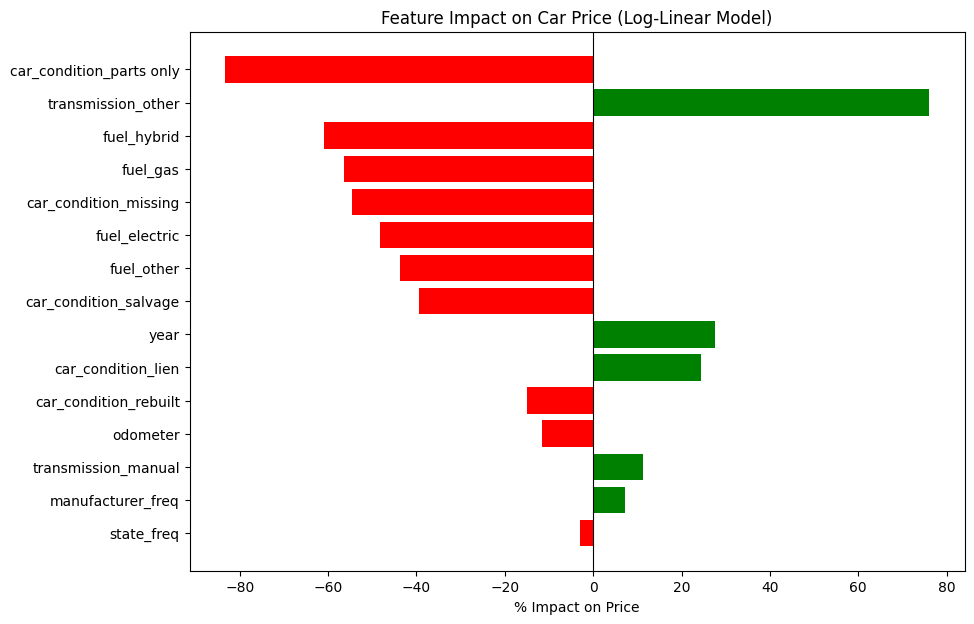

In [53]:
#Plot results:
plt.figure(figsize=(10, 7))
bars = plt.barh(
    coeff_linear_df.index,
    coeff_linear_df['% Impact on Price'],
    color=coeff_linear_df['% Impact on Price'].apply(lambda x: 'green' if x > 0 else 'red')
)

plt.xlabel('% Impact on Price')
plt.title('Feature Impact on Car Price (Log-Linear Model)')
plt.axvline(x=0, color='black', linewidth=0.8)  # vertical line at 0
plt.gca().invert_yaxis()  # to have most impactful feature on top


In [54]:
#Significance of the results (high level assessment):

## 1. Key swing factors in the price of a used car include cars that have used parts only or missing parts (relative to clean cars), those with transmission type other than manual/automatic, and having fuel type other than diesel
## 2. Assuming this dataset is based on price sold of used cars and that the year feature refers to the year when it was manufactured, we see that buyers are willing to spend more money on cars that have transmission type other than automatic/manual, those that are newer/more recent years

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [55]:
### Please see READme file for detailed report

In [56]:
### the audience of this analysis is group of used car dealers that are interested in fine-tuning their inventory
## We will first highlight to them what impact the price of a car (positively and negatively)
## We will then provide recommendation on how to fine tune their inventory assuming they want to focus on cars that will sell at higher prices

In [57]:
### What impacts the price of a car?

## Factors that increase the price of a car include:
#Year of production - for every additional year in the car's model year, the price of the used car increases by ~ 28%
#Transmission type (other than automatic and manual) - these cars are 76% more expensive than cars with more common transmission types
#Manufacturer frequency - cars with more frequent manufacturers are 7% more expensive
#Car condition lien - these financed cars tend to be 24% more expensive when compared to clean cars

## Factors that decrease the price of a car include:
# Certain car conditions relative to clean cars - cars with parts only are 83% cheaper, those with missing parts are 55% cheaper, salvage cars are 39% cheaper and rebuilt cars are 15% cheaper relative to clean cars
# Fuel type - hybrid, gas and electric cars are 61%, 57% and 48% cheaper respectively relative to diesel cars
# Odometer - Higher mileage reduces price by 12% of each mileage increase
# State - states with more frequent cars tend to drive prices slightly lower by 3%

In [58]:
### Recommendation for used car dealers interested in fine tuning their inventory

## From an inventory management perspective, and to maximise value for your cars, focus on newer cars especially those with "clean" condition. Other car conditions will significantly reduce your sale value
## Mileage is impactful and it is recommended to keep cars with lower mileage
## Lastly, keep in mind that transmission types other than automatic & manual could signficantly raise the sale price while hybrid and electric cars have been selling at lower price (compared to diesel).